<a href="https://colab.research.google.com/github/suryagokul/mini-project/blob/main/Reddit%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#from google.colab import drive

In [2]:
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

import numpy as np

In [3]:
df = pd.read_csv('C:/Users/lavan/Downloads/mini-project-main/Train_v2.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


`If you are handling with huge file then go with this snippet using chunksize as per your requirement.chunksize - no.of rows to take...`

reader = pd.read_json("RC_2015-01", orient="records", lines=True, chunksize=200000)

f= []

for i in reader:
    
      f.append(i)
      break

df = f[0]

`It is the final dataframe`

In [4]:
df[:3]


,score_hidden,name,link_id,body,downs,created_utc,score,author,distinguished,id,...,parent_id,subreddit,author_flair_css_class,author_flair_text,gilded,retrieved_on,ups,controversiality,subreddit_id,edited
0,False,t1_cnat3w8,t3_2qx5jp,Damn near everything belongs to the Lizards.,0,1420072332,3,giantbfg,NaN,cnat3w8,...,t1_cnalh8p,skyrim,NaN,NaN,0,1425123882,3.0,0.0,t5_2s837,False
1,False,t1_cnauvlk,t3_2qvdk9,"He does, I'd be backing away very slowly...",0,1420076555,1,tejmar,NaN,cnauvlk,...,t1_cnanz1m,pic,NaN,NaN,0,1425123056,1.0,0.0,t5_2qheq,False
2,False,t1_cnatevb,t3_2kvwjv,"I weigh 285, I guarantee ya I could grab that ...",0,1420073046,-29,GregJarnigan,NaN,cnatevb,...,t3_2kvwjv,fatpeoplehate,NaN,NaN,0,1425123740,-29.0,0.0,t5_2x9xz,False


In [5]:
df.shape

(200090, 21)

### **Features Description**

1. **score_hidden**

> `Some subreddits are using a feature that will hide a comments score for a specific amount of time after being posted. The moderators can choose to hide the score for anywhere from 1 minute to 24 hours. If you hover over [score hidden] the alt text will tell you how long the score will be hidden for in that subreddit.`

2. **name**

> `Name of the users which is displayed.It is unique for each and every user.`

3. **link_id**

> `Id for the comments/submission link.It may be repetitive also`

4. **body**

> `It is the text written in posts....`

5. **downs**

> `It is the downvotes which are given by users for particular post!`

6. **controversiality**

> `It is nothing but rate of controversiality of each and every post.`

7. **gilded**

> `When someone buys you reddit gold on a comment you make, it's called being gilded.`

8. **ups**

> `It is the dependent feature which have to predict.How many number of upvotes will occur based on all the independent features.`

### Statistical Analysis

`It's the science of collecting, exploring and presenting large amounts of data to discover underlying patterns and trends. Statistics are applied every day – in research, industry and government – to become more scientific about decisions that need to be made.Analysing using Statistical techniques.`

In [6]:
df.columns

Index(['score_hidden', 'name', 'link_id', 'body', 'downs', 'created_utc',
       'score', 'author', 'distinguished', 'id', 'archived', 'parent_id',
       'subreddit', 'author_flair_css_class', 'author_flair_text', 'gilded',
       'retrieved_on', 'ups', 'controversiality', 'subreddit_id', 'edited'],
      dtype='object')

In [7]:
df.describe()

,ups,controversiality
count,199936.000000,199936.0
mean,4.353983,0.0
std,30.950947,0.0
min,-353.000000,0.0
25%,1.000000,0.0
50%,1.000000,0.0
75%,3.000000,0.0
max,3967.000000,0.0


`Here we are describing each and every column.For Example consider feature ups,where maximum score is 3967 and minimum score is -302 i.e negative.It only gives description of numerical features..`

In [8]:
df.describe(include='all')

,score_hidden,name,link_id,body,downs,created_utc,score,author,distinguished,id,...,parent_id,subreddit,author_flair_css_class,author_flair_text,gilded,retrieved_on,ups,controversiality,subreddit_id,edited
count,200064,200064,200064,200055,199940,200000,200000,200000,1544,199960,...,200000,200000,61653,58214,200000,199996,199936.000000,199936.0,199936,199936
unique,7,200063,49377,182287,6,23938,547,94087,50,199958,...,137773,6756,10190,19575,53,3864,NaN,NaN,6693,5004
top,False,1,t3_2qys88,[deleted],0,1420071864,1,[deleted],moderator,H5-Onyx,...,t3_2qys88,AskReddit,default,TORNHL,0,1425122380,NaN,NaN,t5_2qh1i,False
freq,199255,2,3797,12917,130971,25,93258,15980,1483,2,...,1643,15587,686,392,199800,159,NaN,NaN,15587,194612
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.353983,0.0,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,30.950947,0.0,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-353.000000,0.0,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.0,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.0,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,0.0,NaN,NaN


**To get description of some categorical columns we have to write `include='all'`as shown above.**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200090 entries, 0 to 200089
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   score_hidden            200064 non-null  object 
 1   name                    200064 non-null  object 
 2   link_id                 200064 non-null  object 
 3   body                    200055 non-null  object 
 4   downs                   199940 non-null  object 
 5   created_utc             200000 non-null  object 
 6   score                   200000 non-null  object 
 7   author                  200000 non-null  object 
 8   distinguished           1544 non-null    object 
 9   id                      199960 non-null  object 
 10  archived                199959 non-null  object 
 11  parent_id               200000 non-null  object 
 12  subreddit               200000 non-null  object 
 13  author_flair_css_class  61653 non-null   object 
 14  author_flair_text   

In [10]:
print(f"Total number of Categorical columns are : {len(df.select_dtypes(include=['object']).columns)}")

Total number of Categorical columns are : 19


### Handling Null Values

`The most time consuming part of a data science project is data cleaning and preparation. However, there are many powerful tools to expedite this process. One of them is Pandas which is a widely used data analysis library for Python.
Handling missing values is an essential part of data cleaning and preparation process because almost all data in real life comes with some missing values.`

In [11]:
df.isnull().sum()

score_hidden                  26
name                          26
link_id                       26
body                          35
downs                        150
created_utc                   90
score                         90
author                        90
distinguished             198546
id                           130
archived                     131
parent_id                     90
subreddit                     90
author_flair_css_class    138437
author_flair_text         141876
gilded                        90
retrieved_on                  94
ups                          154
controversiality             154
subreddit_id                 154
edited                       154
dtype: int64

In [12]:

df.drop(['distinguished','author_flair_css_class','author_flair_text','link_id','id','parent_id','subreddit_id','name','author'],axis=1,inplace=True)

In [13]:
len(df.columns)

12

In [14]:
df.dropna(inplace=True)

In [15]:
df.isnull().any().sum()

0

In [16]:
df[['score','downs','gilded','created_utc','retrieved_on']] = df[['score','downs','gilded','created_utc','retrieved_on']].astype('int')

In [17]:
df.select_dtypes(include=['object']).columns

Index(['score_hidden', 'body', 'archived', 'subreddit', 'edited'], dtype='object')

In [18]:
print(f"After Handling null values and conversion total number of Categorical columns are : {len(df.select_dtypes(include=['object']).columns)}")

After Handling null values and conversion total number of Categorical columns are : 5


`Here by seeing this we can say that subreddits like AskReddit,CFB,hockey are creates more controversiality than others.`

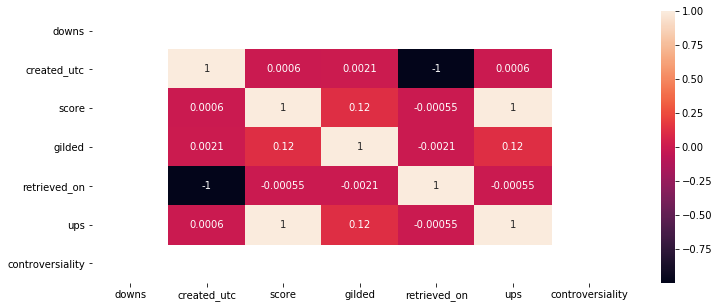

In [19]:
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(),annot=True)

`From the figure We know that created_utc and retrieved_on are negatively correalted.For upvotes w.k.t it depends on score.so they are correlated positively.Upvotes and glided is also positively correlated that means if there are more gliding occurs then upvotes also increases.`

### Handling created_utc feature

In [20]:
print(df.created_utc[0])

df.created_utc.dtype

1420072332


dtype('int32')

In [21]:
from datetime import datetime

In [22]:
datetime.fromtimestamp(df.created_utc[0])

datetime.datetime(2015, 1, 1, 6, 2, 12)

`Here we are decoding utc format for single value but we have to do it for whole dataset as shown below...`

In [23]:
df.created_utc = df.created_utc.apply(lambda x: datetime.fromtimestamp(x))

In [24]:
df.created_utc

0        2015-01-01 06:02:12
1        2015-01-01 07:12:35
2        2015-01-01 06:14:06
3        2015-01-01 08:32:30
4        2015-01-01 11:41:51
                 ...        
200085   2015-01-01 11:50:51
200086   2015-01-01 08:27:51
200087   2015-01-01 06:11:01
200088   2015-01-01 08:39:02
200089   2015-01-01 11:12:19
Name: created_utc, Length: 199931, dtype: datetime64[ns]

In [25]:
print(f"After decoding DataType of feature created_utc is : {df.created_utc.dtype}")

After decoding DataType of feature created_utc is : datetime64[ns]


In [26]:
df.groupby('created_utc')['controversiality'].count().mean()

8.373371864137036

In [27]:
df['created_utc_year'] = df.created_utc.dt.year
df['created_utc_month'] = df.created_utc.dt.month
df['created_utc_week'] = df.created_utc.dt.week
df['created_utc_day'] = df.created_utc.dt.day
df['created_utc_hour'] = df.created_utc.dt.hour
df['created_utc_minute'] = df.created_utc.dt.minute
df['created_utc_dayofweek'] = df.created_utc.dt.dayofweek

`Extracting different type of data from timestamp like year,month,week,day,hour...etc.`

In [28]:
df.drop('created_utc',axis=1,inplace=True)

`After Extracting all useful data from timestamp we are dropping original one i.e created_utc because it becomes redundant.We no need it again.....After that our dataframe looks like below shown.`

In [29]:
df[:3]

,score_hidden,body,downs,score,archived,subreddit,gilded,retrieved_on,ups,controversiality,edited,created_utc_year,created_utc_month,created_utc_week,created_utc_day,created_utc_hour,created_utc_minute,created_utc_dayofweek
0,False,Damn near everything belongs to the Lizards.,0,3,False,skyrim,0,1425123882,3.0,0.0,False,2015,1,1,1,6,2,3
1,False,"He does, I'd be backing away very slowly...",0,1,False,pic,0,1425123056,1.0,0.0,False,2015,1,1,1,7,12,3
2,False,"I weigh 285, I guarantee ya I could grab that ...",0,-29,False,fatpeoplehate,0,1425123740,-29.0,0.0,False,2015,1,1,1,6,14,3


In [30]:
df.groupby('created_utc_hour').size()

created_utc_hour
5     18532
6     34790
7     32963
8     30655
9     28656
10    26219
11    24903
12     3213
dtype: int64

In [31]:
df.groupby('created_utc_month').size()

created_utc_month
1    199931
dtype: int64

`Grouping up the data based on hour and month.We know that the data is about only one month.So,it gives only one group..`

### Handling retrieved_on feature

In [32]:
df.retrieved_on

0         1425123882
1         1425123056
2         1425123740
3         1425122191
4         1425120427
             ...    
200085    1425120354
200086    1425122239
200087    1425123776
200088    1425122126
200089    1425120677
Name: retrieved_on, Length: 199931, dtype: int32

In [33]:
print(f"DataType of feature retrieved_on is : {df.retrieved_on.dtype}")

DataType of feature retrieved_on is : int32


In [34]:
datetime.fromtimestamp(df.retrieved_on[0])

datetime.datetime(2015, 2, 28, 17, 14, 42)

In [35]:
df.retrieved_on = df.retrieved_on.apply(lambda x: datetime.fromtimestamp(x))

In [36]:
df.retrieved_on

0        2015-02-28 17:14:42
1        2015-02-28 17:00:56
2        2015-02-28 17:12:20
3        2015-02-28 16:46:31
4        2015-02-28 16:17:07
                 ...        
200085   2015-02-28 16:15:54
200086   2015-02-28 16:47:19
200087   2015-02-28 17:12:56
200088   2015-02-28 16:45:26
200089   2015-02-28 16:21:17
Name: retrieved_on, Length: 199931, dtype: datetime64[ns]

In [37]:
print(f"After decoding DataType of feature created_utc is : {df.retrieved_on.dtype}")

After decoding DataType of feature created_utc is : datetime64[ns]


In [38]:
df.groupby('retrieved_on')['controversiality'].count().mean()

51.80901788027987

In [39]:
df['retrieved_on_year'] = df.retrieved_on.dt.year
df['retrieved_on_month'] = df.retrieved_on.dt.month
df['retrieved_on_week'] = df.retrieved_on.dt.week
df['retrieved_on_day'] = df.retrieved_on.dt.day
df['retrieved_on_hour'] = df.retrieved_on.dt.hour
df['retrieved_on_minute'] = df.retrieved_on.dt.minute
df['retrieved_on_dayofweek'] = df.retrieved_on.dt.dayofweek

`Extracting different type of data from timestamp like year,month,week,day,hour...etc.`

In [40]:
df.drop('retrieved_on',axis=1,inplace=True)

`After Extracting all useful data from timestamp we are dropping original one i.e retrieved_on because it becomes redundant.We no need it again.....After that our dataframe looks like below shown.`

In [41]:
df[:2]

,score_hidden,body,downs,score,archived,subreddit,gilded,ups,controversiality,edited,...,created_utc_hour,created_utc_minute,created_utc_dayofweek,retrieved_on_year,retrieved_on_month,retrieved_on_week,retrieved_on_day,retrieved_on_hour,retrieved_on_minute,retrieved_on_dayofweek
0,False,Damn near everything belongs to the Lizards.,0,3,False,skyrim,0,3.0,0.0,False,...,6,2,3,2015,2,9,28,17,14,5
1,False,"He does, I'd be backing away very slowly...",0,1,False,pic,0,1.0,0.0,False,...,7,12,3,2015,2,9,28,17,0,5


In [42]:
df.groupby('retrieved_on_month').size()

retrieved_on_month
2    199931
dtype: int64

In [43]:
df.groupby('retrieved_on_hour').size()

retrieved_on_hour
16    136729
17     63202
dtype: int64

`Grouping up the data based on hour and month.We know that the data is about only one month.So,it gives only one group..`

In [44]:
df.columns

Index(['score_hidden', 'body', 'downs', 'score', 'archived', 'subreddit',
       'gilded', 'ups', 'controversiality', 'edited', 'created_utc_year',
       'created_utc_month', 'created_utc_week', 'created_utc_day',
       'created_utc_hour', 'created_utc_minute', 'created_utc_dayofweek',
       'retrieved_on_year', 'retrieved_on_month', 'retrieved_on_week',
       'retrieved_on_day', 'retrieved_on_hour', 'retrieved_on_minute',
       'retrieved_on_dayofweek'],
      dtype='object')

### Data Analysis and Data Visualization

In [45]:
df.groupby('subreddit')['controversiality'].count().sort_values(ascending=False)

subreddit
AskReddit         15587
CFB                6430
funny              4145
pics               3481
nba                3351
                  ...  
LOMBackstories        1
LOLStreams            1
ctbeer                1
LILYLILYLILY          1
100DaysofKeto         1
Name: controversiality, Length: 6693, dtype: int64

`Here for each subreddit we are calculating the controversiality rate.From this data we can conclude that subreddits like AskReddit,CFB,hockey,funny are more controversial than others.`

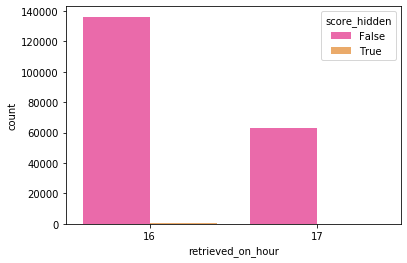

In [46]:
sns.countplot(df.retrieved_on_hour,hue=df.score_hidden,palette='spring')

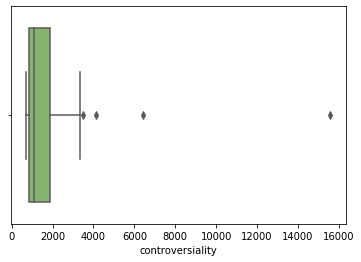

In [47]:
sns.boxplot(df.groupby('subreddit')['controversiality'].count().sort_values(ascending=False)[:40],palette='summer')

`As we can see that there are some outliers not that much.So I think we need not to bother for some of them.`

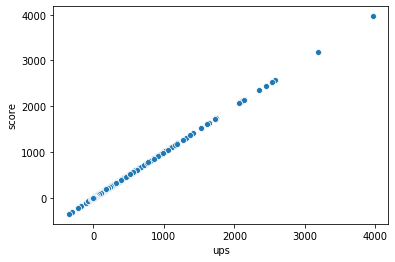

In [48]:
sns.scatterplot(df.ups,df.score)

`It is well fitted because we know that score is dependent on number of upvotes.As we seen earlier they are positively correlated ones.`

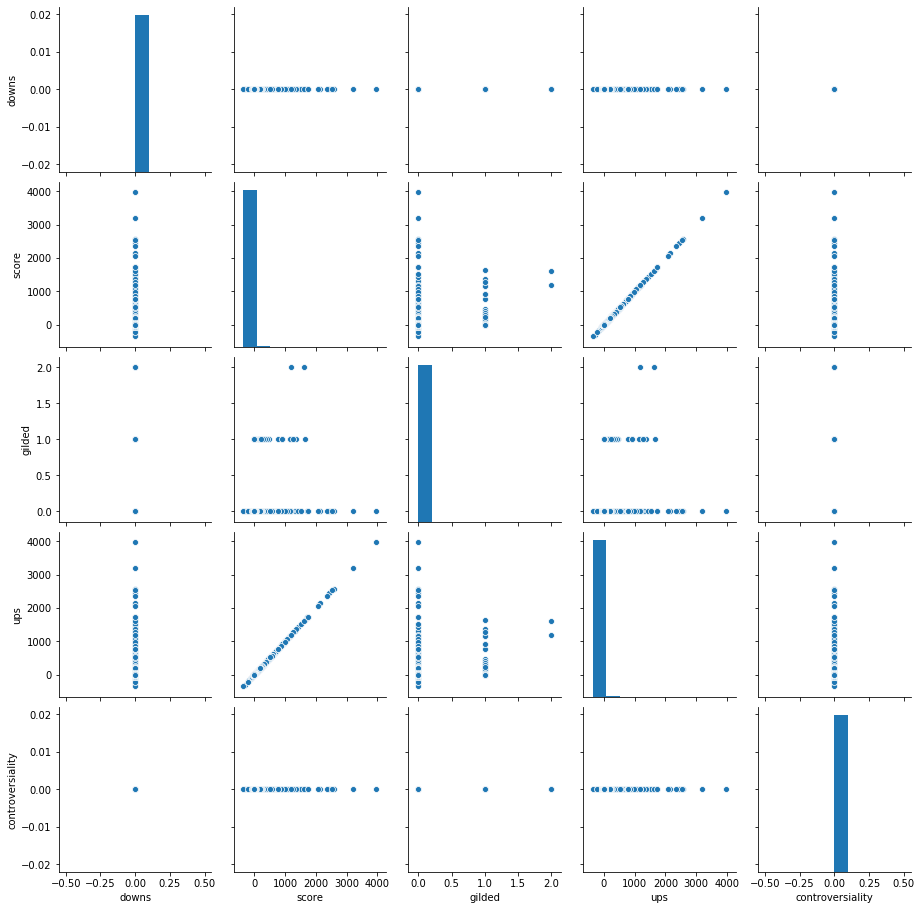

In [49]:
sns.pairplot(df[['downs', 'score', 'subreddit',
       'gilded', 'ups', 'controversiality', 'edited']])

In [50]:
df.groupby('subreddit')['edited'].count()[:10]

subreddit
100DaysofKeto             1
100yearsago               2
1200isplenty              7
121stSquadron             1
19KidsandCounting         1
2000sMusic                1
2007scape               238
2014                      1
2015readingchallenge      2
2019                      1
Name: edited, dtype: int64

In [51]:
df.groupby('score_hidden')['ups'].mean()

score_hidden
False    4.366592
True     1.000000
Name: ups, dtype: float64

In [52]:
df1 = df

### Handling other columns

In [53]:
dummy = pd.get_dummies(df[['archived','score_hidden']],drop_first=True)

In [54]:
dummy

,archived_False,score_hidden_True
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
200085,0,0
200086,0,0
200087,0,0
200088,0,0


In [55]:
df = pd.concat([df,dummy],axis=1)

df.drop(['archived','score_hidden'],axis=1,inplace=True)

In [56]:
df[:3]

,body,downs,score,subreddit,gilded,ups,controversiality,edited,created_utc_year,created_utc_month,...,created_utc_dayofweek,retrieved_on_year,retrieved_on_month,retrieved_on_week,retrieved_on_day,retrieved_on_hour,retrieved_on_minute,retrieved_on_dayofweek,archived_False,score_hidden_True
0,Damn near everything belongs to the Lizards.,0,3,skyrim,0,3.0,0.0,False,2015,1,...,3,2015,2,9,28,17,14,5,1,0
1,"He does, I'd be backing away very slowly...",0,1,pic,0,1.0,0.0,False,2015,1,...,3,2015,2,9,28,17,0,5,1,0
2,"I weigh 285, I guarantee ya I could grab that ...",0,-29,fatpeoplehate,0,-29.0,0.0,False,2015,1,...,3,2015,2,9,28,17,12,5,1,0


In [57]:
df.edited.nunique()

5001

In [58]:
df.drop('edited',axis=1,inplace=True)

In [59]:
len(df.columns)

23

In [60]:
df.select_dtypes(include=['object'])

,body,subreddit
0,Damn near everything belongs to the Lizards.,skyrim
1,"He does, I'd be backing away very slowly...",pic
2,"I weigh 285, I guarantee ya I could grab that ...",fatpeoplehate
3,"""This is warm. This is mine.""",AnimalsBeingJerks
4,Look the baby's father is already ugly as hell...,ffxiv
...,...,...
200085,wow. The first source seems like dogshit. But ...,news
200086,There isn't much of a difference. In a lot def...,AskWomen
200087,"Lamy Safari, Cross Bailey, Lamy 2000, and the ...",fountainpens
200088,"Also, maybe you guys can socialize while accom...",introvert


###  **Word2Vec**  Handling `body` feature

In [61]:
df1.body

0              Damn near everything belongs to the Lizards.
1               He does, I'd be backing away very slowly...
2         I weigh 285, I guarantee ya I could grab that ...
3                             "This is warm. This is mine."
4         Look the baby's father is already ugly as hell...
                                ...                        
200085    wow. The first source seems like dogshit. But ...
200086    There isn't much of a difference. In a lot def...
200087    Lamy Safari, Cross Bailey, Lamy 2000, and the ...
200088    Also, maybe you guys can socialize while accom...
200089                                 * Cazz yule as kripp
Name: body, Length: 199931, dtype: object

In [62]:
len(df1.body[1])

43

In [63]:
df1.body[1]

"He does, I'd be backing away very slowly..."

In [64]:
import nltk

In [65]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lavan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [66]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lavan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [67]:
from nltk.corpus import stopwords

# Initialize the stopwords
stoplist = stopwords.words('english')

In [69]:
import gensim

ModuleNotFoundError: No module named 'gensim'

In [70]:
from gensim.models import Word2Vec

ModuleNotFoundError: No module named 'gensim'

In [71]:
#df1.body.apply(lambda words: ' '.join(word for word in sentences if word not in stoplist))

In [72]:
sentences = [nltk.word_tokenize(words) for words in df1.body]

In [73]:
model = Word2Vec(sentences,min_count=1) 

In [74]:
ordered_vocab = [(term, voc.index, voc.count) for term, voc in model.wv.vocab.items()]
ordered_vocab = sorted(ordered_vocab, key=lambda k: k[2])
ordered_terms, term_indices, term_counts = zip(*ordered_vocab)
word_vectors = pd.DataFrame(model.wv.syn0[term_indices, :], index=ordered_terms)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  after removing the cwd from sys.path.


In [75]:
word_vectors

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
putz,0.008577,-0.005522,-0.013510,0.001406,0.018808,0.006063,0.000997,-0.012913,-0.009613,-0.012184,-0.002645,-0.003134,0.003945,0.022076,0.001826,-0.006829,0.021292,0.004561,0.006778,0.010260,0.017229,-0.006038,0.029883,0.010574,0.012365,0.008992,-0.020122,-0.004222,-0.000909,0.000818,-0.003159,0.001179,-0.007545,-0.011263,0.007678,0.000438,-0.008502,0.007507,-0.009368,0.020990,...,-0.023842,-0.010158,0.023073,-0.001701,0.001797,0.008789,0.004563,0.006143,-0.001172,0.009731,0.001680,0.013776,-0.010302,-0.004682,-0.017196,0.007319,-0.009076,0.000296,0.010907,-0.000236,0.015438,0.000621,0.005591,0.020530,0.010985,0.009970,-0.003591,0.000251,-0.029562,-0.016584,0.000430,0.014794,0.004065,-0.000490,-0.008985,-0.017983,-0.005586,0.006301,0.016389,0.002384
knee-cap,0.021866,-0.004196,0.003514,0.003269,0.019884,0.008177,0.013714,-0.010123,-0.002684,0.000794,-0.004803,-0.001548,0.007418,0.012263,0.010904,-0.006890,0.016061,-0.006950,0.031813,0.018029,0.001731,0.012857,0.019139,0.014897,0.030771,0.001034,-0.017802,-0.010283,-0.009917,-0.014994,-0.003220,-0.001164,0.001065,-0.003619,0.008634,0.003704,0.012399,-0.005363,-0.003517,0.008827,...,0.010731,0.001291,-0.003805,-0.008598,-0.005464,0.002080,-0.011965,0.000974,-0.005749,0.002722,-0.018995,0.004414,-0.037357,0.008706,0.001850,0.003960,-0.007337,0.006630,0.002926,0.027901,0.008823,0.014973,0.006352,0.003023,-0.010952,-0.000786,-0.007913,-0.015672,-0.017176,-0.005141,-0.020586,0.024874,0.010718,-0.029710,0.008675,-0.004794,0.008759,0.007809,0.020296,0.014591
sperged,0.008177,-0.028605,-0.029320,-0.010114,-0.016247,0.002413,0.029512,-0.008324,-0.001254,0.014387,-0.015143,0.010662,0.006320,-0.005269,0.008767,-0.015648,-0.003015,0.003613,0.020388,-0.018053,-0.002310,0.018965,0.012847,0.015405,0.024207,-0.024135,-0.010364,-0.017408,-0.016696,-0.004538,0.009249,0.004475,-0.023841,0.011338,0.004454,-0.002938,0.008121,-0.000702,-0.011320,0.017191,...,-0.009259,0.011677,-0.027344,-0.022359,0.002734,-0.005680,-0.013384,0.028056,-0.012604,0.018646,-0.019567,-0.008802,0.002433,0.009566,0.012553,-0.000028,-0.013045,0.018931,-0.004031,0.004171,-0.001603,0.003635,0.012009,-0.014016,0.014158,0.005945,-0.008543,-0.004313,-0.018162,0.002078,-0.017284,-0.016496,0.007802,-0.016122,0.000313,0.011463,-0.016099,-0.001463,0.015381,-0.003592
statments,-0.018562,-0.034474,0.016745,-0.011081,0.010430,0.012509,0.029811,-0.002235,-0.006685,0.012417,-0.008422,0.004019,-0.005334,0.007435,-0.002738,-0.016348,0.014268,-0.013038,0.011805,0.017686,0.001225,-0.001939,0.005977,0.001079,0.019602,0.008569,-0.025127,-0.024928,-0.021971,-0.014987,0.003587,-0.009377,0.005898,0.001813,0.006100,-0.000519,0.004178,-0.001676,-0.015525,0.004121,...,0.012496,-0.006532,-0.008794,-0.010172,0.016029,-0.019995,0.013724,-0.001913,-0.019119,0.016529,-0.038817,-0.005619,-0.029921,0.021111,-0.005507,-0.004556,-0.018854,-0.036330,-0.014383,0.025672,0.010402,0.024583,-0.004106,0.008087,0.013378,-0.028009,-0.013208,-0.017670,-0.012439,-0.000241,-0.008065,0.027719,0.014411,0.005145,-0.000585,0.026835,-0.002605,-0.013255,0.023445,0.004503
marvelverse,-0.007671,-0.032245,0.006168,-0.015753,0.009642,-0.023567,0.015112,-0.017086,-0.004867,-0.021952,-0.000169,-0.010793,-0.000964,-0.004936,0.000967,-0.000349,-0.012434,-0.008966,0.012626,0.016429,0.001124,-0.017762,0.034426,-0.012496,0.015599,0.020948,0.005841,0.021454,0.005232,-0.001152,-0.010712,-0.003911,-0.011175,0.028814,-0.000701,-0.004001,-0.008471,-0.024165,-0.005619,0.002535,...,-0.007033,-0.001976,-0.019099,-0.033346,-0.020058,-0.003851,0.000515,0.008010,0.001241,-0.005232,-0.022775,0.008869,-0.006399,-0.003326,-0.012982,-0.012458,-0.011222,-0.030333,0.015856,-0.000449,-0.006956,0.015831,-0.004504,0.016739,-0.021764,0.009429,-0.003961,-0.009653,-0.013568,-0

In [76]:
df2 = df

In [77]:
df2.shape

(199931, 23)

In [78]:
word_vectors.drop(word_vectors.tail(3051).index,inplace=True)

In [79]:
word_vectors.shape

(199931, 100)

In [80]:
indices = word_vectors.index

In [81]:
indices

Index(['putz', 'knee-cap', 'sperged', 'statments', 'marvelverse', '43.65',
       '2619', '2147', '2091', '/u/Transcendentist',
       ...
       'factors', 'latest', 'valuable', 'repost', 'significantly', 'Hard',
       'famous', 'dislike', 'audience', 'hat'],
      dtype='object', length=199931)

In [82]:
word_vectors

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
putz,0.008577,-0.005522,-0.013510,0.001406,0.018808,0.006063,0.000997,-0.012913,-0.009613,-0.012184,-0.002645,-0.003134,0.003945,0.022076,0.001826,-0.006829,0.021292,0.004561,0.006778,0.010260,0.017229,-0.006038,0.029883,0.010574,0.012365,0.008992,-0.020122,-0.004222,-0.000909,0.000818,-0.003159,0.001179,-0.007545,-0.011263,0.007678,0.000438,-0.008502,0.007507,-0.009368,0.020990,...,-0.023842,-0.010158,0.023073,-0.001701,0.001797,0.008789,0.004563,0.006143,-0.001172,0.009731,0.001680,0.013776,-0.010302,-0.004682,-0.017196,0.007319,-0.009076,0.000296,0.010907,-0.000236,0.015438,0.000621,0.005591,0.020530,0.010985,0.009970,-0.003591,0.000251,-0.029562,-0.016584,0.000430,0.014794,0.004065,-0.000490,-0.008985,-0.017983,-0.005586,0.006301,0.016389,0.002384
knee-cap,0.021866,-0.004196,0.003514,0.003269,0.019884,0.008177,0.013714,-0.010123,-0.002684,0.000794,-0.004803,-0.001548,0.007418,0.012263,0.010904,-0.006890,0.016061,-0.006950,0.031813,0.018029,0.001731,0.012857,0.019139,0.014897,0.030771,0.001034,-0.017802,-0.010283,-0.009917,-0.014994,-0.003220,-0.001164,0.001065,-0.003619,0.008634,0.003704,0.012399,-0.005363,-0.003517,0.008827,...,0.010731,0.001291,-0.003805,-0.008598,-0.005464,0.002080,-0.011965,0.000974,-0.005749,0.002722,-0.018995,0.004414,-0.037357,0.008706,0.001850,0.003960,-0.007337,0.006630,0.002926,0.027901,0.008823,0.014973,0.006352,0.003023,-0.010952,-0.000786,-0.007913,-0.015672,-0.017176,-0.005141,-0.020586,0.024874,0.010718,-0.029710,0.008675,-0.004794,0.008759,0.007809,0.020296,0.014591
sperged,0.008177,-0.028605,-0.029320,-0.010114,-0.016247,0.002413,0.029512,-0.008324,-0.001254,0.014387,-0.015143,0.010662,0.006320,-0.005269,0.008767,-0.015648,-0.003015,0.003613,0.020388,-0.018053,-0.002310,0.018965,0.012847,0.015405,0.024207,-0.024135,-0.010364,-0.017408,-0.016696,-0.004538,0.009249,0.004475,-0.023841,0.011338,0.004454,-0.002938,0.008121,-0.000702,-0.011320,0.017191,...,-0.009259,0.011677,-0.027344,-0.022359,0.002734,-0.005680,-0.013384,0.028056,-0.012604,0.018646,-0.019567,-0.008802,0.002433,0.009566,0.012553,-0.000028,-0.013045,0.018931,-0.004031,0.004171,-0.001603,0.003635,0.012009,-0.014016,0.014158,0.005945,-0.008543,-0.004313,-0.018162,0.002078,-0.017284,-0.016496,0.007802,-0.016122,0.000313,0.011463,-0.016099,-0.001463,0.015381,-0.003592
statments,-0.018562,-0.034474,0.016745,-0.011081,0.010430,0.012509,0.029811,-0.002235,-0.006685,0.012417,-0.008422,0.004019,-0.005334,0.007435,-0.002738,-0.016348,0.014268,-0.013038,0.011805,0.017686,0.001225,-0.001939,0.005977,0.001079,0.019602,0.008569,-0.025127,-0.024928,-0.021971,-0.014987,0.003587,-0.009377,0.005898,0.001813,0.006100,-0.000519,0.004178,-0.001676,-0.015525,0.004121,...,0.012496,-0.006532,-0.008794,-0.010172,0.016029,-0.019995,0.013724,-0.001913,-0.019119,0.016529,-0.038817,-0.005619,-0.029921,0.021111,-0.005507,-0.004556,-0.018854,-0.036330,-0.014383,0.025672,0.010402,0.024583,-0.004106,0.008087,0.013378,-0.028009,-0.013208,-0.017670,-0.012439,-0.000241,-0.008065,0.027719,0.014411,0.005145,-0.000585,0.026835,-0.002605,-0.013255,0.023445,0.004503
marvelverse,-0.007671,-0.032245,0.006168,-0.015753,0.009642,-0.023567,0.015112,-0.017086,-0.004867,-0.021952,-0.000169,-0.010793,-0.000964,-0.004936,0.000967,-0.000349,-0.012434,-0.008966,0.012626,0.016429,0.001124,-0.017762,0.034426,-0.012496,0.015599,0.020948,0.005841,0.021454,0.005232,-0.001152,-0.010712,-0.003911,-0.011175,0.028814,-0.000701,-0.004001,-0.008471,-0.024165,-0.005619,0.002535,...,-0.007033,-0.001976,-0.019099,-0.033346,-0.020058,-0.003851,0.000515,0.008010,0.001241,-0.005232,-0.022775,0.008869,-0.006399,-0.003326,-0.012982,-0.012458,-0.011222,-0.030333,0.015856,-0.000449,-0.006956,0.015831,-0.004504,0.016739,-0.021764,0.009429,-0.003961,-0.009653,-0.013568,-0

In [83]:
df2.shape

(199931, 23)

In [84]:
word_vectors.shape

(199931, 100)

In [85]:
df3 = pd.DataFrame(np.hstack([df2,word_vectors]))

In [86]:
df3.shape

(199931, 123)

In [87]:
df3.isnull().any().sum()

0

In [88]:
column_indices = range(123)
new_names = df2.columns
old_names = df3.columns[column_indices]
df3.rename(columns=dict(zip(old_names, new_names)), inplace=True)

In [89]:
df3[:2]

,body,downs,score,subreddit,gilded,ups,controversiality,created_utc_year,created_utc_month,created_utc_week,created_utc_day,created_utc_hour,created_utc_minute,created_utc_dayofweek,retrieved_on_year,retrieved_on_month,retrieved_on_week,retrieved_on_day,retrieved_on_hour,retrieved_on_minute,retrieved_on_dayofweek,archived_False,score_hidden_True,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122
0,Damn near everything belongs to the Lizards.,0,3,skyrim,0,3,0,2015,1,1,1,0,32,3,2015,2,9,28,11,44,5,1,0,0.00857736,-0.00552207,-0.0135102,0.00140602,0.0188077,0.0060634,0.000997408,-0.0129131,-0.00961316,-0.0121843,-0.00264458,-0.00313406,0.00394539,0.0220759,0.00182619,-0.00682927,0.0212922,...,-0.0238421,-0.0101579,0.023073,-0.00170124,0.00179674,0.00878884,0.00456261,0.00614251,-0.00117229,0.0097309,0.00168016,0.0137758,-0.0103018,-0.00468238,-0.0171957,0.00731867,-0.00907582,0.000296474,0.0109068,-0.000236063,0.0154377,0.000620987,0.00559073,0.0205303,0.0109855,0.00996955,-0.00359052,0.000250668,-0.0295619,-0.0165835,0.000429855,0.0147938,0.00406465,-0.000490323,-0.00898508,-0.0179828,-0.00558607,0.00630127,0.0163894,0.0023845
1,"He does, I'd be backing away very slowly...",0,1,pic,0,1,0,2015,1,1,1,1,42,3,2015,2,9,28,11,30,5,1,0,0.0218656,-0.00419581,0.00351368,0.00326876,0.0198837,0.00817681,0.0137135,-0.0101234,-0.00268371,0.000794055,-0.00480321,-0.00154773,0.0074183,0.0122634,0.0109043,-0.00689023,0.0160607,...,0.0107314,0.00129115,-0.0038046,-0.00859764,-0.00546448,0.00208035,-0.0119654,0.000973735,-0.00574891,0.00272188,-0.018995,0.00441382,-0.0373574,0.00870585,0.00184985,0.00396039,-0.00733703,0.00662995,0.00292594,0.0279012,0.00882292,0.0149731,0.00635209,0.00302273,-0.0109516,-0.000785746,-0.00791344,-0.0156716,-0.0171762,-0.00514139,-0.0205856,0.0248743,0.0107181,-0.0297103,0.00867489,-0.00479443,0.00875949,0.00780935,0.0202959,0.0145912


In [90]:
df3.drop(['body','subreddit'],axis=1,inplace=True)

In [96]:
df4 = df3

### Building Linear Regression

In [94]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor

In [98]:
X = df4.drop('ups',axis=1)

y = df4['ups']

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.3)

In [102]:
print(f"Shape of training data is : {X_train.shape} and testing data is : {X_test.shape}")

Shape of training data is : (139951, 120) and testing data is : (59980, 120)


In [103]:
lr = LinearRegression().fit(X_train,y_train)

In [105]:
lr_pred = lr.predict(X_test)

In [106]:
lr.score(X_test,y_test)

1.0

In [127]:
def lr_predict(downs,score,gilded,controversiality):
  x = np.zeros(len(X.columns))
  x[0] = downs
  x[1] = score
  x[2] = gilded
  x[3] = controversiality

  return lr.predict([x])[0]


In [128]:
upvotes_predicted = lr_predict(10,150,10,11)

upvotes_predicted.round()

185.0

In [129]:
result = lr_predict(100,1,1,1)

print(f"Upvotes predicted is : {result.round()}")

Upvotes predicted is : 36.0


In [130]:
import pickle

In [131]:
with open('linear_model','wb') as f:
  pickle.dump(lr,f)

### Building KNearestNeighbours

In [122]:
knn = KNeighborsRegressor()

In [123]:
knn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [124]:
knn_pred = knn.predict(X_test)

In [125]:
from sklearn.metrics import mean_squared_error

In [126]:
mean_squared_error(y_test,knn_pred)

1.4232404134711576

In [132]:
def knn_predict(downs,score,gilded,controversiality):
  x = np.zeros(len(X.columns))
  x[0] = downs
  x[1] = score
  x[2] = gilded
  x[3] = controversiality

  return knn.predict([x])[0]

In [135]:
single_pred_knn = knn_predict(10,150,10,11)

single_pred_knn

147.6

In [136]:
result = knn_predict(100,1,1,1)

print(f"Upvotes predicted is : {result}")

Upvotes predicted is : 1.0


In [137]:
with open('knn_model','wb') as f:
  pickle.dump(knn,f)

### Building RandomForest

In [138]:
rfr = RandomForestRegressor()

In [139]:
rfr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [148]:
rfr_pred = rfr.predict(X_test)

In [141]:
rfr.score(X_test,y_test)

0.9968516462709167

In [143]:
def rfr_predict(downs,score,gilded,controversiality):
  x = np.zeros(len(X.columns))
  x[0] = downs
  x[1] = score
  x[2] = gilded
  x[3] = controversiality

  return rfr.predict([x])[0]

In [144]:
single_pred_rfr = rfr_predict(10,150,10,11)

single_pred_rfr

150.1

In [145]:
rfr_result = rfr_predict(100,1,1,1)

print(f"Upvotes predicted by Random Forest Model is : {rfr_result}")

Upvotes predicted by Random Forest Model is : 1.0


In [142]:
from sklearn.metrics import mean_absolute_error

In [149]:
mean_absolute_error(y_test,rfr_pred)

0.022056518839613203

In [146]:
with open('rfr_model','wb') as f:
  pickle.dump(rfr,f)